# Poison clustering
### Fasion MNIST 3 Class clustering

In [1]:
import os
os.chdir('../')
import random
import matplotlib.pyplot as plt
#!pip install torch
#!pip install torchvision

In [2]:
from run_experiments import test_robustness
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch
from sklearn import preprocessing
import numpy as np
from clustorch.kmeans import KMeans
from clustorch.spectral import SpectralClustering
from clustorch.hierarchical import Hierarchical
from experiments.utilities import shuffle_indexes

In [3]:
DEVICE = 'cpu'
PATH = 'results'

In [4]:
def filter_by_label(x, y, labels, n_samples, encode=True, device="cpu"):
    le = preprocessing.LabelEncoder()
    to_pick = torch.tensor([], dtype=torch.long)
    for l in labels:
        mask = y == l
        valid = torch.nonzero(mask, as_tuple=False)
        to_pick_l = shuffle_indexes(valid)[:n_samples]
        to_pick = torch.cat((to_pick, to_pick_l), dim=0)
    X = x[to_pick].view(-1, 28 * 28).float()
    X = X.unsqueeze(2).to(device)
    X /= 255.0
    Y = y[to_pick].view(-1)
    if encode:
        Y = torch.from_numpy(le.fit_transform(Y))
    Y = Y.to(device)
    return X, Y

## F-MNIST

In [5]:
root = "./data/"
trans = transforms.Compose([transforms.ToTensor(),])
train_set = dset.FashionMNIST(root=root, train=True, transform=trans, download=True)

torch.manual_seed(4)
n_samples = 800

dt_range = np.linspace(start=1, num=1, stop=1)
s_range = np.linspace(start=0.6, num=1, stop=0.6)

X, Y = filter_by_label(
    x=train_set.data,
    y=train_set.targets,
    labels=[6, 9],  # [9,3]
    n_samples=n_samples,
    device=DEVICE,
)
k = len(Y.unique())
models = [
        SpectralClustering(
            n_clusters=k, lmode="rw", similarity="gaussian_zp", assign_labels="kmeans",
        ),
        Hierarchical(n_clusters=k),
    ]
#models = [
#    KMeans(n_clusters=k)
#]

In [6]:
print(train_set.data.shape)
print(X.shape)
print(np.unique(Y))
print(Y.shape)
print(k)

torch.Size([60000, 28, 28])
torch.Size([1600, 784, 1])
[0 1]
torch.Size([1600])
2


In [10]:
#dt_range = np.linspace(start=0.2, num=1, stop=0.2)
dt_range = np.linspace(start=0.5, num=10, stop=1)
#s_range = np.linspace(start=0.56894737, num=1, stop=0.6)
s_range = np.linspace(start=0.1, num=1, stop=0.1)

In [11]:
print(dt_range)
print(s_range)

[0.5        0.55555556 0.61111111 0.66666667 0.72222222 0.77777778
 0.83333333 0.88888889 0.94444444 1.        ]
[0.1]


In [12]:
X,Y,X_adv,yadv,ts_idx = test_robustness(
        X,
        Y,
        models=models,
        dt_range=dt_range,
        s_range=s_range,
        lb=1 / 255,
        mutation_rate=0.1,
        path=PATH + "/fashionMNIST/",
    )

  0%|                                                    | 0/10 [00:00<?, ?it/s]


====================== Starting time: 2022-06-26 22:13:36.019628 model: Spectral ==============


 10%|████▎                                      | 1/10 [03:41<33:14, 221.63s/it]

delta:0.5  s:0.1  AMI_hat:0.7507003677514736  pmean_eps:0.2371438592672348 AMI:0.542588206659029 NMI_drop:0.10323678919059742 ACC_drop:0.03312499999999996 dt:0.5 model:Spectral;
======================== Time: 0:03:40.167169 =================================================

====================== Starting time: 2022-06-26 22:17:17.660030 model: Spectral ==============


 20%|████████▌                                  | 2/10 [07:21<29:22, 220.32s/it]

delta:0.5555555555555556  s:0.1  AMI_hat:0.7324419281021529  pmean_eps:0.2620828449726105 AMI:0.551724827202538 NMI_drop:0.09410427039636526 ACC_drop:0.030625000000000013 dt:0.5555555555555556 model:Spectral;
======================== Time: 0:03:37.916062 =================================================

====================== Starting time: 2022-06-26 22:20:57.060133 model: Spectral ==============


 30%|████████████▉                              | 3/10 [11:00<25:39, 219.96s/it]

delta:0.6111111111111112  s:0.1  AMI_hat:0.718246370299404  pmean_eps:0.28682857751846313 AMI:0.5610158128901023 NMI_drop:0.0848173702103937 ACC_drop:0.028749999999999942 dt:0.6111111111111112 model:Spectral;
======================== Time: 0:03:38.059903 =================================================

====================== Starting time: 2022-06-26 22:24:36.601134 model: Spectral ==============


 40%|█████████████████▏                         | 4/10 [14:40<21:58, 219.81s/it]

delta:0.6666666666666666  s:0.1  AMI_hat:0.689112360863967  pmean_eps:0.3113967478275299 AMI:0.5715349915545312 NMI_drop:0.07430297267109143 ACC_drop:0.02562500000000001 dt:0.6666666666666666 model:Spectral;
======================== Time: 0:03:38.082343 =================================================

====================== Starting time: 2022-06-26 22:28:16.180390 model: Spectral ==============


 50%|█████████████████████▌                     | 5/10 [23:46<28:07, 337.41s/it]

delta:0.7222222222222222  s:0.1  AMI_hat:0.6744557700267788  pmean_eps:0.5606289505958557 AMI:0.5795703832100801 NMI_drop:0.06627133259356321 ACC_drop:0.022499999999999964 dt:0.7222222222222222 model:Spectral;
======================== Time: 0:09:04.449128 =================================================

====================== Starting time: 2022-06-26 22:37:22.091380 model: Spectral ==============


 60%|█████████████████████████▊                 | 6/10 [48:01<47:49, 717.48s/it]

delta:0.7777777777777778  s:0.1  AMI_hat:0.673865461659602  pmean_eps:0.35996535420417786 AMI:0.5822428628764375 NMI_drop:0.06359996684021707 ACC_drop:0.022499999999999964 dt:0.7777777777777778 model:Spectral;
======================== Time: 0:24:13.792709 =================================================

====================== Starting time: 2022-06-26 23:01:37.368603 model: Spectral ==============


 70%|██████████████████████████████             | 7/10 [51:41<27:44, 554.96s/it]

delta:0.8333333333333333  s:0.1  AMI_hat:0.6702386062017578  pmean_eps:0.3839503228664398 AMI:0.5840325709226254 NMI_drop:0.061811085548807876 ACC_drop:0.021874999999999978 dt:0.8333333333333333 model:Spectral;
======================== Time: 0:03:38.855972 =================================================

====================== Starting time: 2022-06-26 23:05:17.710690 model: Spectral ==============


 80%|██████████████████████████████████▍        | 8/10 [55:20<14:56, 448.02s/it]

delta:0.8888888888888888  s:0.1  AMI_hat:0.6666817020241788  pmean_eps:0.4077381491661072 AMI:0.5858299661688376 NMI_drop:0.06001452017875597 ACC_drop:0.02124999999999999 dt:0.8888888888888888 model:Spectral;
======================== Time: 0:03:37.570634 =================================================

====================== Starting time: 2022-06-26 23:08:56.765772 model: Spectral ==============


 90%|██████████████████████████████████████▋    | 9/10 [59:01<06:16, 376.93s/it]

delta:0.9444444444444444  s:0.1  AMI_hat:0.6563837729338843  pmean_eps:0.4312819242477417 AMI:0.5912690778735906 NMI_drop:0.05457791721517147 ACC_drop:0.01937500000000003 dt:0.9444444444444444 model:Spectral;
======================== Time: 0:03:39.098932 =================================================

====================== Starting time: 2022-06-26 23:12:37.373997 model: Spectral ==============


100%|████████████████████████████████████████| 10/10 [1:02:40<00:00, 376.03s/it]

delta:1.0  s:0.1  AMI_hat:0.6497919145892206  pmean_eps:0.45459142327308655 AMI:0.5949350863789845 NMI_drop:0.050913597527555976 ACC_drop:0.018124999999999947 dt:1.0 model:Spectral;
======================== Time: 0:03:37.430773 =================================================



  0%|                                                    | 0/10 [00:00<?, ?it/s]


====================== Starting time: 2022-06-26 23:16:16.605751 model: Hierarchical euclidean ==============


 10%|████▎                                      | 1/10 [01:56<17:30, 116.76s/it]

delta:0.5  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.4438265562057495 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.5 model:Hierarchical euclidean;
======================== Time: 0:01:56.203524 =================================================

====================== Starting time: 2022-06-26 23:18:13.370978 model: Hierarchical euclidean ==============


 20%|████████▌                                  | 2/10 [11:30<51:23, 385.46s/it]

delta:0.5555555555555556  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.4426538944244385 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.5555555555555556 model:Hierarchical euclidean;
======================== Time: 0:09:32.948580 =================================================

====================== Starting time: 2022-06-26 23:27:46.914796 model: Hierarchical euclidean ==============


 30%|███████████▍                          | 3/10 [1:33:46<4:47:23, 2463.41s/it]

delta:0.6111111111111112  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.2896195650100708 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.6111111111111112 model:Hierarchical euclidean;
======================== Time: 1:22:15.405088 =================================================

====================== Starting time: 2022-06-27 00:50:03.083354 model: Hierarchical euclidean ==============


 40%|███████████████▏                      | 4/10 [1:35:50<2:33:59, 1539.89s/it]

delta:0.6666666666666666  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.3146555721759796 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.6666666666666666 model:Hierarchical euclidean;
======================== Time: 0:02:03.508093 =================================================

====================== Starting time: 2022-06-27 00:52:07.213482 model: Hierarchical euclidean ==============


 50%|███████████████████                   | 5/10 [1:37:51<1:25:40, 1028.17s/it]

delta:0.7222222222222222  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.3395387530326843 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.7222222222222222 model:Hierarchical euclidean;
======================== Time: 0:02:00.235943 =================================================

====================== Starting time: 2022-06-27 00:54:08.056275 model: Hierarchical euclidean ==============


 60%|████████████████████████▌                | 6/10 [1:39:58<48:06, 721.67s/it]

delta:0.7777777777777778  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.3642600476741791 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.7777777777777778 model:Hierarchical euclidean;
======================== Time: 0:02:06.001517 =================================================

====================== Starting time: 2022-06-27 00:56:14.746244 model: Hierarchical euclidean ==============


 70%|████████████████████████████▋            | 7/10 [1:42:02<26:19, 526.38s/it]

delta:0.8333333333333333  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.3888308107852936 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.8333333333333333 model:Hierarchical euclidean;
======================== Time: 0:02:03.673692 =================================================

====================== Starting time: 2022-06-27 00:58:19.060174 model: Hierarchical euclidean ==============


 80%|████████████████████████████████▊        | 8/10 [1:44:13<13:20, 400.38s/it]

delta:0.8888888888888888  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.7640374302864075 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.8888888888888888 model:Hierarchical euclidean;
======================== Time: 0:02:10.001196 =================================================

====================== Starting time: 2022-06-27 01:00:29.666321 model: Hierarchical euclidean ==============


 90%|████████████████████████████████████▉    | 9/10 [1:46:20<05:14, 314.94s/it]

delta:0.9444444444444444  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.8082794547080994 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:0.9444444444444444 model:Hierarchical euclidean;
======================== Time: 0:02:06.456710 =================================================

====================== Starting time: 2022-06-27 01:02:36.738720 model: Hierarchical euclidean ==============


100%|████████████████████████████████████████| 10/10 [1:48:27<00:00, 650.76s/it]

delta:1.0  s:0.1  AMI_hat:0.7672724820738259  pmean_eps:0.8519396185874939 AMI:0.7672724820738259 NMI_drop:0.23262214219518884 ACC_drop:0.04812499999999997 dt:1.0 model:Hierarchical euclidean;
======================== Time: 0:02:06.900364 =================================================


In [15]:
pertub =[]
non_pertub = []
for i in range(X.shape[0]):
    if((X[i]-X_adv[i]).sum()!=0):
        pertub.append(i)
    elif((X[i]-X_adv[i]).sum()==0):
        non_pertub.append(i)
print(len(pertub))
print(len(non_pertub))

143
1457


In [22]:
os.chdir('20%')

In [23]:
!ls

Pertub_idx_FMNIST_6,9_20%.npy Y_FMNIST_6,9.npy
X_FMNIST_6,9.npy              Yadv_FMINIST_6,9_20%.npy
Xadv_FMNIST_6,9_20%.npy


In [24]:
np.save('X_FMNIST_6,9.npy',X.numpy())
np.save('Y_FMNIST_6,9.npy',Y.numpy())
np.save('Xadv_FMNIST_6,9_20%.npy',X_adv.numpy())
np.save('Yadv_FMINIST_6,9_20%.npy',yadv.numpy())
np.save('Pertub_idx_FMNIST_6,9_20%.npy',pertub)

In [25]:
print(X.shape)
print(Y.shape)
print(X_adv.shape)
print(yadv.shape)
print(len(ts_idx))
print(len(ts_idx)/X.shape[1])
print(len(np.unique(ts_idx)))

torch.Size([1600, 784, 1])
torch.Size([1600])
torch.Size([1600, 784, 1])
torch.Size([1600])
123088
157.0
784


In [181]:
ts_idx[:784].numpy()-catc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [180]:
ts_idx[:784].numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [148]:
ts_idx[784:1568].numpy()

array([  60,  800,  801,  802,  803,  804,  805,  806,  807,  808,  809,
        810,  811,  813,  814,  815,  816,  817,  818,  819,  820,  821,
        822,  823,  824,  825,  826,  827,  828,  829,  830,  831,  832,
        833,  834,  835,  836,  837,  838,  839,  840,  841,  842,  843,
        844,  845,  846,  847,  848,  849,  850,  851,  852,  853,  854,
        855,  856,  857,  858,  859,  860,  861,  862,  863,  864,  865,
        866,  867,  869,  870,  871,  872,  873,  874,  875,  876,  877,
        878,  879,  880,  881,  882,  883,  884,  885,  886,  887,  888,
        889,  890,  891,  892,  893,  894,  895,  896,  897,  898,  899,
        900,  901,  902,  903,  904,  906,  907,  908,  909,  910,  911,
        912,  913,  914,  915,  916,  917,  918,  919,  920,  921,  922,
        923,  924,  925,  926,  927,  928,  929,  930,  931,  932,  933,
        934,  935,  936,  937,  938,  939,  940,  941,  942,  943,  945,
        946,  947,  948,  949,  950,  951,  952,  9

In [273]:
np.unique(ts_idx).shape

(784,)

In [235]:
(X[802]-Xadv[802]).sum()

tensor(-48.9381)

In [252]:
X[ts_idx].shape

torch.Size([308112, 784, 1])

In [274]:
len(non_pertub)

816

In [71]:
pertub

[60,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,

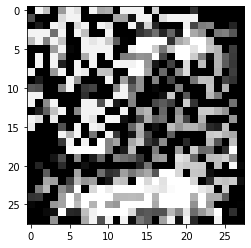

In [19]:
plt.imshow(Xadv[808].reshape(28,28).numpy(),cmap='gray')

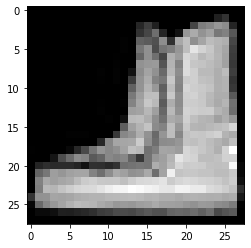

In [20]:
plt.imshow(X[808].reshape(28,28).numpy(),cmap='gray')#np.squeeze(X[0])

In [275]:
len(pertub)

784

## CIFAR
### 2Clusters

In [5]:
device = DEVICE

x = torch.load("./data/cifar10/cifar_features_classes016.pt")
y = torch.load("./data/cifar10/cifar_labels_classes016.pt")

X = x.unsqueeze(2).to(device)
Y = y.to(device)

#dt_range = np.linspace(start=0.01, stop=1.5, num=20)
#s_range = np.linspace(start=0.01, num=20, stop=0.6)

k = len(Y.unique())

In [6]:
print(X.shape)
print(np.unique(Y))
print(Y.shape)
print(k)

torch.Size([1600, 512, 1])
[0 1 6]
torch.Size([1600])
3


In [7]:
X = X[Y!=6]
Y= Y[Y!=6]
k = len(Y.unique())

In [8]:
print(X.shape)
print(np.unique(Y))
print(Y.shape)
print(k)

torch.Size([1054, 512, 1])
[0 1]
torch.Size([1054])
2


In [9]:
models = [
    KMeans(n_clusters=k)
]

In [10]:
#dt_range = np.linspace(start=0.7999999999999999 , num=1, stop=0.7999999999999999 )
dt_range = np.linspace(start=0.05, num=20, stop=1)
#s_range = np.linspace(start=0.56894737, num=1, stop=0.6)
s_range = np.linspace(start=0.2, num=1, stop=0.2)

In [11]:
print(dt_range)
print(s_range)

[0.8]
[0.2]


In [12]:
X,Y,X_adv,yadv,ts_idx = test_robustness(
        X,
        Y,
        models=models,
        dt_range=dt_range,
        s_range=s_range,
        lb=1 / 255,
        mutation_rate=0.1,
        path=PATH + "/CIFAR/",
    )

  0%|                                                     | 0/1 [00:00<?, ?it/s]


====================== Starting time: 2022-06-26 04:27:17.540332 model: KMeans ==============


100%|█████████████████████████████████████████████| 1/1 [00:34<00:00, 34.45s/it]

delta:0.7999999999999999  s:0.2  AMI_hat:0.1247462014352214  pmean_eps:0.6608299016952515 AMI:0.11149743423578162 NMI_drop:0.794389509188878 ACC_drop:0.42030360531309297 dt:0.7999999999999999;
======================== Time: 0:00:34.327476 =================================================


In [49]:
#plt.imshow(Xadv[808].reshape(28,28).numpy(),cmap='gray')

In [13]:
pertub =[]
non_pertub = []
for i in range(X.shape[0]):
    if((X[i]-X_adv[i]).sum()!=0):
        pertub.append(i)
    elif((X[i]-X_adv[i]).sum()==0):
        non_pertub.append(i)
print(len(pertub))
print(len(non_pertub))

144
910


In [14]:
print(X.shape)
print(Y.shape)
print(X_adv.shape)
print(yadv.shape)
print(len(ts_idx))
print(len(ts_idx)/X.shape[1])
print(len(np.unique(ts_idx)))

torch.Size([1054, 512, 1])
torch.Size([1054])
torch.Size([1054, 512, 1])
torch.Size([1054])
54784
107.0
512


In [15]:
os.chdir('CIFAR/20%')

In [16]:
!ls

In [17]:
np.save('X_CIFAR_0,1.npy',X.numpy())
np.save('Y_CIFAR_0,1.npy',Y.numpy())
np.save('Xadv_CIFAR_0,1_20%.npy',X_adv.numpy())
np.save('Yadv_CIFAR_0,1_20%.npy',yadv.numpy())
np.save('Pertub_idx_CIFAR_0,1_20%.npy',pertub)

## MNIST
### 2 Cluster

In [5]:
root = "./data/"
trans = transforms.Compose([transforms.ToTensor(),])
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)

torch.manual_seed(4)
n_samples = 800

dt_range = np.linspace(start=1, num=1, stop=1)
s_range = np.linspace(start=0.6, num=1, stop=0.6)

X, Y = filter_by_label(
    x=train_set.data,
    y=train_set.targets,
    labels=[6, 9],  # [9,3]
    n_samples=n_samples,
    device=DEVICE,
)
k = len(Y.unique())
models = [
    KMeans(n_clusters=k)
]

In [6]:
print(train_set.data.shape)
print(X.shape)
print(np.unique(Y))
print(Y.shape)
print(k)

torch.Size([60000, 28, 28])
torch.Size([1600, 784, 1])
[0 1]
torch.Size([1600])
2


In [7]:
#plt.imshow(X[7].reshape(28,28).numpy(),cmap='gray')

In [8]:
models = [
    KMeans(n_clusters=k)
]

In [10]:
#dt_range = np.linspace(start=0.95, num=1, stop=1)
dt_range = np.linspace(start=0.05, num=20, stop=1)
#s_range = np.linspace(start=0.56894737, num=1, stop=0.6)
s_range = np.linspace(start=0.2, num=1, stop=0.2)

In [11]:
print(dt_range)
print(s_range)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
[0.2]


In [12]:
X,Y,X_adv,yadv,ts_idx = test_robustness(
        X,
        Y,
        models=models,
        dt_range=dt_range,
        s_range=s_range,
        lb=1 / 255,
        mutation_rate=0.1,
        path=PATH + "/MNIST/",
    )

  0%|                                                    | 0/20 [00:00<?, ?it/s]


====================== Starting time: 2022-06-26 11:09:29.552464 model: KMeans ==============


  5%|██▏                                        | 1/20 [02:52<54:33, 172.30s/it]

delta:0.05  s:0.2  AMI_hat:0.982175890321605  pmean_eps:0.04352382570505142 AMI:0.9336579121027873 NMI_drop:-0.005558047398345867 ACC_drop:-0.0006249999999999867 dt:0.05;
======================== Time: 0:02:51.799763 =================================================

====================== Starting time: 2022-06-26 11:12:21.862433 model: KMeans ==============


 10%|████▎                                      | 2/20 [05:38<50:37, 168.76s/it]

delta:0.1  s:0.2  AMI_hat:-0.00025158726263407475  pmean_eps:0.08631991595029831 AMI:-6.957188340953385e-05 NMI_drop:0.927740337921345 ACC_drop:0.48 dt:0.1;
======================== Time: 0:02:45.818391 =================================================

====================== Starting time: 2022-06-26 11:15:08.137727 model: KMeans ==============


 15%|██████▍                                    | 3/20 [08:23<47:16, 166.88s/it]

delta:0.15  s:0.2  AMI_hat:0.9293510579826371  pmean_eps:0.1294260323047638 AMI:0.8894507932736694 NMI_drop:0.03862911496494936 ACC_drop:0.0068749999999999645 dt:0.15;
======================== Time: 0:02:44.216185 =================================================

====================== Starting time: 2022-06-26 11:17:52.784428 model: KMeans ==============


 20%|████████▌                                  | 4/20 [11:08<44:22, 166.41s/it]

delta:0.2  s:0.2  AMI_hat:0.901897224456941  pmean_eps:0.17155444622039795 AMI:0.864418375580178 NMI_drop:0.06365022291507949 ACC_drop:0.011874999999999969 dt:0.2;
======================== Time: 0:02:45.252113 =================================================

====================== Starting time: 2022-06-26 11:20:38.466019 model: KMeans ==============


 25%|██████████▊                                | 5/20 [13:53<41:26, 165.79s/it]

delta:0.25  s:0.2  AMI_hat:0.014669371681995579  pmean_eps:0.21391020715236664 AMI:0.015952150498208712 NMI_drop:0.9117288689800583 ACC_drop:0.4175 dt:0.25;
======================== Time: 0:02:44.272017 =================================================

====================== Starting time: 2022-06-26 11:23:23.168709 model: KMeans ==============


 30%|████████████▉                              | 6/20 [16:40<38:47, 166.25s/it]

delta:0.3  s:0.2  AMI_hat:0.007236596296266645  pmean_eps:0.25572702288627625 AMI:0.008191656461279463 NMI_drop:0.9194837016144536 ACC_drop:0.438125 dt:0.3;
======================== Time: 0:02:46.697654 =================================================

====================== Starting time: 2022-06-26 11:26:10.295695 model: KMeans ==============


 35%|██████████████▎                          | 7/20 [33:50<1:37:10, 448.53s/it]

delta:0.35  s:0.2  AMI_hat:0.015194318222920496  pmean_eps:0.16518238186836243 AMI:0.016495388680357898 NMI_drop:0.9111860182811244 ACC_drop:0.41625 dt:0.35;
======================== Time: 0:17:08.816618 =================================================

====================== Starting time: 2022-06-26 11:43:20.005999 model: KMeans ==============


 40%|████████████████▍                        | 8/20 [36:35<1:11:40, 358.35s/it]

delta:0.39999999999999997  s:0.2  AMI_hat:0.6325396804575574  pmean_eps:0.33682575821876526 AMI:0.6111122712218008 NMI_drop:0.3168396077760468 ACC_drop:0.09062499999999996 dt:0.39999999999999997;
======================== Time: 0:02:44.808772 =================================================

====================== Starting time: 2022-06-26 11:46:05.263295 model: KMeans ==============


 45%|███████████████████▎                       | 9/20 [39:20<54:35, 297.78s/it]

delta:0.44999999999999996  s:0.2  AMI_hat:0.7131770065397004  pmean_eps:0.21150176227092743 AMI:0.6971782936082386 NMI_drop:0.23081394668239452 ACC_drop:0.05999999999999994 dt:0.44999999999999996;
======================== Time: 0:02:44.152741 =================================================

====================== Starting time: 2022-06-26 11:48:49.873440 model: KMeans ==============


 50%|█████████████████████                     | 10/20 [42:05<42:48, 256.83s/it]

delta:0.49999999999999994  s:0.2  AMI_hat:0.6356969803245057  pmean_eps:0.23455187678337097 AMI:0.6212634041073727 NMI_drop:0.3066931812089382 ACC_drop:0.08812500000000001 dt:0.49999999999999994;
======================== Time: 0:02:44.665147 =================================================

====================== Starting time: 2022-06-26 11:51:35.006103 model: KMeans ==============


 55%|███████████████████████                   | 11/20 [44:47<34:10, 227.87s/it]

delta:0.5499999999999999  s:0.2  AMI_hat:0.6231933387999773  pmean_eps:0.25752022862434387 AMI:0.6089858440792009 NMI_drop:0.3189648647236023 ACC_drop:0.09312500000000001 dt:0.5499999999999999;
======================== Time: 0:02:41.787182 =================================================

====================== Starting time: 2022-06-26 11:54:17.221559 model: KMeans ==============


 60%|█████████████████████████▏                | 12/20 [47:32<27:48, 208.55s/it]

delta:0.6  s:0.2  AMI_hat:0.6216535049924726  pmean_eps:0.2804166376590729 AMI:0.6074734158104028 NMI_drop:0.32047656645368816 ACC_drop:0.09375 dt:0.6;
======================== Time: 0:02:43.934586 =================================================

====================== Starting time: 2022-06-26 11:57:01.585994 model: KMeans ==============


 65%|███████████████████████████▎              | 13/20 [50:15<22:44, 194.94s/it]

delta:0.65  s:0.2  AMI_hat:0.6356969803245056  pmean_eps:0.3032406270503998 AMI:0.6076230179688362 NMI_drop:0.3203273288117038 ACC_drop:0.09062499999999996 dt:0.65;
======================== Time: 0:02:43.143040 =================================================

====================== Starting time: 2022-06-26 11:59:45.202370 model: KMeans ==============


 70%|█████████████████████████████▍            | 14/20 [53:00<18:34, 185.82s/it]

delta:0.7  s:0.2  AMI_hat:0.6356969803245057  pmean_eps:0.3259980380535126 AMI:0.6076230179688361 NMI_drop:0.3203273288117038 ACC_drop:0.09062499999999996 dt:0.7;
======================== Time: 0:02:44.278329 =================================================

====================== Starting time: 2022-06-26 12:02:29.950789 model: KMeans ==============


 75%|███████████████████████████████▌          | 15/20 [55:45<14:57, 179.59s/it]

delta:0.75  s:0.2  AMI_hat:0.6420763644653377  pmean_eps:0.348691463470459 AMI:0.6138350000864817 NMI_drop:0.3141183114865944 ACC_drop:0.08812500000000001 dt:0.75;
======================== Time: 0:02:44.697791 =================================================

====================== Starting time: 2022-06-26 12:05:15.113808 model: KMeans ==============


 80%|█████████████████████████████████▌        | 16/20 [58:32<11:43, 175.78s/it]

delta:0.7999999999999999  s:0.2  AMI_hat:0.6385071842284085  pmean_eps:0.3713062107563019 AMI:0.6122470959692298 NMI_drop:0.31570558070362253 ACC_drop:0.08749999999999991 dt:0.7999999999999999;
======================== Time: 0:02:46.478622 =================================================

====================== Starting time: 2022-06-26 12:08:02.047219 model: KMeans ==============


 85%|██████████████████████████████████      | 17/20 [1:01:18<08:38, 172.73s/it]

delta:0.85  s:0.2  AMI_hat:0.6385071842284085  pmean_eps:0.39383116364479065 AMI:0.6122470959692298 NMI_drop:0.31570558070362253 ACC_drop:0.08749999999999991 dt:0.85;
======================== Time: 0:02:45.138456 =================================================

====================== Starting time: 2022-06-26 12:10:47.664780 model: KMeans ==============


 90%|████████████████████████████████████    | 18/20 [1:04:04<05:41, 170.70s/it]

delta:0.9  s:0.2  AMI_hat:0.6279372280281094  pmean_eps:0.4162834882736206 AMI:0.6093280460973916 NMI_drop:0.318623357045667 ACC_drop:0.08749999999999991 dt:0.9;
======================== Time: 0:02:45.519472 =================================================

====================== Starting time: 2022-06-26 12:13:33.653684 model: KMeans ==============


 95%|██████████████████████████████████████  | 19/20 [1:06:49<02:49, 169.21s/it]

delta:0.95  s:0.2  AMI_hat:0.6279372280281094  pmean_eps:0.43865248560905457 AMI:0.6093280460973916 NMI_drop:0.318623357045667 ACC_drop:0.08749999999999991 dt:0.95;
======================== Time: 0:02:45.260607 =================================================

====================== Starting time: 2022-06-26 12:16:19.396246 model: KMeans ==============


100%|████████████████████████████████████████| 20/20 [1:09:36<00:00, 208.80s/it]

delta:1.0  s:0.2  AMI_hat:0.13390362156507574  pmean_eps:0.8230907917022705 AMI:0.12516513183431047 NMI_drop:0.8024127738920055 ACC_drop:0.40312499999999996 dt:1.0;
======================== Time: 0:02:45.808831 =================================================


In [13]:
pertub =[]
non_pertub = []
for i in range(X.shape[0]):
    if((X[i]-X_adv[i]).sum()!=0):
        pertub.append(i)
    elif((X[i]-X_adv[i]).sum()==0):
        non_pertub.append(i)
print(len(pertub))
print(len(non_pertub))

143
1457


In [14]:
print(X.shape)
print(Y.shape)
print(X_adv.shape)
print(yadv.shape)
print(len(ts_idx))
print(len(ts_idx)/X.shape[1])
print(len(np.unique(ts_idx)))

torch.Size([1600, 784, 1])
torch.Size([1600])
torch.Size([1600, 784, 1])
torch.Size([1600])
124656
159.0
784


In [15]:
os.chdir('MNIST/20%')

In [16]:
!ls

In [17]:
np.save('X_MNIST_6,9.npy',X.numpy())
np.save('Y_MNIST_6,9.npy',Y.numpy())
np.save('Xadv_MNIST_6,9_20%.npy',X_adv.numpy())
np.save('Yadv_MNIST_6,9_20%.npy',yadv.numpy())
np.save('Pertub_idx_MNIST_6,9_20%.npy',pertub)

## CIFAR
### 3Clusters

In [110]:
from run_multiway_clustering import test_robustness
import torch
import numpy as np
from clustorch.kmeans import KMeans
from clustorch.spectral import SpectralClustering
from clustorch.hierarchical import Hierarchical

In [111]:
DEVICE = 'cpu'
PATH = 'results'

In [112]:
device = DEVICE

x = torch.load("./data/cifar10/cifar_features_classes016.pt")
y = torch.load("./data/cifar10/cifar_labels_classes016.pt")

X = x.unsqueeze(2).to(device)
Y = y.to(device)

#dt_range = np.linspace(start=0.01, stop=1.5, num=20)
#s_range = np.linspace(start=0.01, num=20, stop=0.6)

k = len(Y.unique())

models = [
    KMeans(n_clusters=k, max_tol=1e-05, max_iter=500)
]

In [191]:
x.shape

torch.Size([1600, 512])

In [192]:
X.shape

torch.Size([1600, 512, 1])

In [113]:
X[0].shape

torch.Size([512, 1])

In [114]:
def filter_by_label_CIFAR(x, y, labels, n_samples, encode=True, device="cpu"):
    le = preprocessing.LabelEncoder()
    to_pick = torch.tensor([], dtype=torch.long)
    for l in labels:
        mask = y == l
        valid = torch.nonzero(mask, as_tuple=False)
        to_pick_l = shuffle_indexes(valid)[:n_samples]
        to_pick = torch.cat((to_pick, to_pick_l), dim=0)
    X = x[to_pick].view(-1, 512).float()
    X = X.unsqueeze(2).to(device)
    X /= 255.0
    Y = y[to_pick].view(-1)
    if encode:
        Y = torch.from_numpy(le.fit_transform(Y))
    Y = Y.to(device)
    return X, Y

In [97]:
X, Y = filter_by_label_CIFAR(
    x=X,
    y=Y,
    labels=[0, 1],  # [9,3]
    n_samples=n_samples,
    device=DEVICE,
)
k = len(Y.unique())
models = [
    KMeans(n_clusters=k)
]

In [115]:
k

3

In [116]:
np.unique(Y)

array([0, 1, 6])

In [117]:
X.shape

torch.Size([1600, 512, 1])

In [118]:
#dt_range = np.linspace(start=0.01, stop=1.5, num=10)
#s_range = np.linspace(start=0.01, num=10, stop=0.6)

In [145]:
dt_range = np.linspace(start=0.67222222, stop=0.67222222, num=1)
s_range = np.linspace(start=0.9, num=1, stop=0.9)
print(dt_range)
print(s_range)

[0.67222222]
[0.9]


In [146]:
k

3

In [147]:
X,Y,Xadv,yadv,ts_idx =test_robustness(
        X,
        Y,
        y_target=6,
        models=models,
        dt_range=dt_range,
        box=(0, 6),
        s_range=s_range,
        lb=1 / 255,
        path=PATH + "cifar/",
    )

  0%|                                                     | 0/1 [00:00<?, ?it/s]


====================== Starting time: 2022-06-21 15:56:36.060021 model: KMeans ==============


100%|████████████████████████████████████████████| 1/1 [06:28<00:00, 388.15s/it]

delta:0.67222222  s:0.9  totOverN:303.04  AMI_hat:0.9628918348570411  pmean_eps:0.538892388343811 l2:253.69679260253906;
======================== Time: 0:06:25.416000 =================================================


In [148]:
X.shape

torch.Size([1600, 512, 1])

In [149]:
Xadv.shape

torch.Size([1600, 512, 1])

In [150]:
Y.shape

torch.Size([1600])

In [151]:
yadv.shape

torch.Size([1600])

In [152]:
len(np.unique(ts_idx))

1024

In [153]:
pertub =[]
for i in range(X.shape[0]):
    if((X[i]-Xadv[i]).mean()!=0):
        pertub.append(i)

In [176]:
(X[2]-Xadv[2]).mean()

tensor(-0.0664)

In [179]:
torch.nonzero(Xadv - X, as_tuple=False).2

torch.Size([319405, 3])

In [154]:
len(pertub)

1024

In [156]:
ts_idx.shape[0]#/512

484864

In [181]:
len(np.unique(ts_idx))

1024

In [159]:
ts_idx[0:50]

tensor([ 179,  119, 1492,  487,    0,  364, 1205,  369, 1359,  349, 1089,  116,
        1458,  279, 1453,  276, 1364, 1093, 1403, 1482,   21,  497,  865,    8,
        1530,  305,  521,  757,  273, 1102,  590, 1340,  904,   89,  561,  310,
         353, 1030,  360, 1317,  937, 1233, 1288,  398, 1552,  929,  543, 1489,
        1549,  341])

In [ ]:
#pertub = np.unique(ts_idx)

In [28]:
np.save('X.npy',X.numpy())

np.save('Y.npy',Y.numpy())

np.save('Xadv.npy',Xadv.numpy())

np.save('Yadv.npy',yadv.numpy())

np.save('Pertub_idx.npy',pertub)

In [185]:
import matplotlib.pyplot as plt

In [190]:
plt.imshow(  X[0].permute(2, 2, 1)  )

RuntimeError: number of dims don't match in permute

In [187]:
X[0].shape

torch.Size([512, 1])

In [12]:
X,Y,Xadv,yadv,ts_idx =test_robustness(
        X,
        Y,
        y_target=6,
        models=models,
        dt_range=dt_range,
        box=(0, 6),
        s_range=s_range,
        lb=1 / 255,
        path=PATH + "cifar/",
    )


  0%|                                                    | 0/10 [00:00<?, ?it/s]


====================== Starting time: 2022-06-14 15:24:07.396787 model: KMeans ==============
delta:0.01  s:0.01  totOverN:3.2  AMI_hat:0.9778010650166475  pmean_eps:0.007112600840628147 l2:5.428807258605957;
======================== Time: 0:00:12.830720 =================================================

====================== Starting time: 2022-06-14 15:24:20.289831 model: KMeans ==============
delta:0.01  s:0.07555555555555554  totOverN:25.28  AMI_hat:0.9703149210947865  pmean_eps:0.009581910446286201 l2:6.714141368865967;
======================== Time: 0:00:33.913920 =================================================

====================== Starting time: 2022-06-14 15:24:54.401971 model: KMeans ==============
delta:0.01  s:0.1411111111111111  totOverN:47.36  AMI_hat:0.9749492306994508  pmean_eps:0.009474326856434345 l2:6.561487197875977;
======================== Time: 0:00:54.077161 =================================================

====================== Starting time: 2022-06-14

 10%|████                                    | 1/10 [22:28<3:22:12, 1348.03s/it]

delta:0.01  s:0.6  totOverN:201.92  AMI_hat:0.9811496155738793  pmean_eps:0.008285078220069408 l2:5.281057357788086;
======================== Time: 0:04:25.270826 =================================================

====================== Starting time: 2022-06-14 15:46:35.426153 model: KMeans ==============
delta:0.17555555555555558  s:0.01  totOverN:3.2  AMI_hat:0.8398791222098677  pmean_eps:0.1150006577372551 l2:84.10761260986328;
======================== Time: 0:00:12.705708 =================================================

====================== Starting time: 2022-06-14 15:46:48.206728 model: KMeans ==============
delta:0.17555555555555558  s:0.07555555555555554  totOverN:25.28  AMI_hat:0.8476469198629647  pmean_eps:0.12568965554237366 l2:89.6161880493164;
======================== Time: 0:00:34.258280 =================================================

====================== Starting time: 2022-06-14 15:47:22.647461 model: KMeans ==============
delta:0.17555555555555558  s:0.141111

 20%|███████▌                              | 2/10 [1:03:31<4:27:11, 2003.96s/it]

delta:0.17555555555555558  s:0.6  totOverN:201.92  AMI_hat:0.8296265246504951  pmean_eps:0.14493314921855927 l2:85.085693359375;
======================== Time: 0:16:34.600448 =================================================

====================== Starting time: 2022-06-14 16:27:38.539996 model: KMeans ==============
delta:0.34111111111111114  s:0.01  totOverN:3.2  AMI_hat:0.9665411729074265  pmean_eps:0.2766120731830597 l2:177.96385192871094;
======================== Time: 0:00:10.004398 =================================================

====================== Starting time: 2022-06-14 16:27:48.599847 model: KMeans ==============
delta:0.34111111111111114  s:0.07555555555555554  totOverN:25.28  AMI_hat:0.928817194140932  pmean_eps:0.3298783600330353 l2:199.07322692871094;
======================== Time: 0:13:18.206569 =================================================

====================== Starting time: 2022-06-14 16:41:06.986505 model: KMeans ==============
delta:0.3411111111111111

 30%|███████████▍                          | 3/10 [2:14:47<5:54:52, 3041.77s/it]

delta:0.34111111111111114  s:0.6  totOverN:201.92  AMI_hat:0.9560680989266243  pmean_eps:0.2815048098564148 l2:155.87945556640625;
======================== Time: 0:37:37.747437 =================================================

====================== Starting time: 2022-06-14 17:38:55.311443 model: KMeans ==============
delta:0.5066666666666667  s:0.01  totOverN:3.2  AMI_hat:0.9266646999745632  pmean_eps:0.3894088864326477 l2:243.34173583984375;
======================== Time: 0:00:09.434253 =================================================

====================== Starting time: 2022-06-14 17:39:04.799488 model: KMeans ==============
delta:0.5066666666666667  s:0.07555555555555554  totOverN:25.28  AMI_hat:0.9266646999745632  pmean_eps:0.43752390146255493 l2:259.3190612792969;
======================== Time: 0:00:29.188211 =================================================

====================== Starting time: 2022-06-14 17:39:34.163602 model: KMeans ==============
delta:0.506666666666666

 40%|███████████████▏                      | 4/10 [2:37:32<3:57:57, 2379.50s/it]

delta:0.5066666666666667  s:0.6  totOverN:201.92  AMI_hat:0.9683148862877977  pmean_eps:0.41979748010635376 l2:221.1660614013672;
======================== Time: 0:04:48.693768 =================================================

====================== Starting time: 2022-06-14 18:01:39.547333 model: KMeans ==============
delta:0.6722222222222223  s:0.01  totOverN:3.2  AMI_hat:0.9266646999745632  pmean_eps:0.5565648674964905 l2:326.45489501953125;
======================== Time: 0:00:11.485707 =================================================

====================== Starting time: 2022-06-14 18:01:51.121691 model: KMeans ==============
delta:0.6722222222222223  s:0.07555555555555554  totOverN:25.28  AMI_hat:0.9266646999745632  pmean_eps:0.6483839750289917 l2:358.0771179199219;
======================== Time: 0:00:33.470868 =================================================

====================== Starting time: 2022-06-14 18:02:24.768547 model: KMeans ==============
delta:0.6722222222222223 

 50%|███████████████████                   | 5/10 [3:00:02<2:47:21, 2008.30s/it]

delta:0.6722222222222223  s:0.6  totOverN:201.92  AMI_hat:0.9266646999745632  pmean_eps:0.554611086845398 l2:281.7634582519531;
======================== Time: 0:04:32.545140 =================================================

====================== Starting time: 2022-06-14 18:24:09.681556 model: KMeans ==============
delta:0.8377777777777778  s:0.01  totOverN:3.2  AMI_hat:0.9266646999745632  pmean_eps:0.7126181721687317 l2:403.160400390625;
======================== Time: 0:00:09.833729 =================================================

====================== Starting time: 2022-06-14 18:24:19.578639 model: KMeans ==============
delta:0.8377777777777778  s:0.07555555555555554  totOverN:25.28  AMI_hat:0.6224349500421196  pmean_eps:0.8108443021774292 l2:435.36175537109375;
======================== Time: 0:00:32.618817 =================================================

====================== Starting time: 2022-06-14 18:24:52.384892 model: KMeans ==============
delta:0.8377777777777778  s:

 50%|███████████████████                   | 5/10 [3:04:03<3:04:03, 2208.77s/it]


KeyboardInterrupt: 

# Class

In [30]:
from run_experiments import test_robustness
from run_multiway_clustering import test_robustness
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch
from sklearn import preprocessing
import numpy as np
from clustorch.kmeans import KMeans
from clustorch.spectral import SpectralClustering
from clustorch.hierarchical import Hierarchical
from experiments.utilities import shuffle_indexes

In [ ]:
class Cina:
    def __init__(self, path='results',dt_range = np.linspace(start=0.95, num=1, stop=1, seed=[42]), s_range = np.linspace(start=0.56894737, num=1, stop=0.6),device='cpu'):
        self.path = path
        self.dt_range=dt_range
        self.s_range = s_range
        self.device = device
        self.seed=seed
        self.model=[]
    def generate_adv_samples(self,model=['kmeans'],X,Y):
        self.X=X
        self.Y=Y
        self.k = len(self.Y.unique())
        if('kmeans' in model):
            self.model.append(KMeans(n_clusters=self.k))
        if('spectral' in model):
            self.model.append(SpectralClustering(n_clusters=self.k, lmode="rw", similarity="gaussian_zp", assign_labels="kmeans"))
        if('heirarchical' in model):
            self.model.append(Hierarchical(n_clusters=self.k))
        X,Y,Xadv,yadv,ts_idx = test_robustness(
        self.X,
        self.Y,
        models=self.model,
        dt_range=self.dt_range,
        s_range=self.s_range,
        lb=1 / 255,
        mutation_rate=0.1,
        path=self.path + "/fashionMNIST/",
        seeds=self.seed)
        return X,Y,Xadv,yadv,ts_idx
    def filter_by_label(self,x, y, labels, n_samples, encode=True, device="cpu"):
        le = preprocessing.LabelEncoder()
        to_pick = torch.tensor([], dtype=torch.long)
        for l in labels:
            mask = y == l
            valid = torch.nonzero(mask, as_tuple=False)
            to_pick_l = shuffle_indexes(valid)[:n_samples]
            to_pick = torch.cat((to_pick, to_pick_l), dim=0)
        X = x[to_pick].view(-1, 28 * 28).float()
        X = X.unsqueeze(2).to(device)
        X /= 255.0
        Y = y[to_pick].view(-1)
        if encode:
            Y = torch.from_numpy(le.fit_transform(Y))
        Y = Y.to(device)
        return X, Y
    def 
        
        

In [31]:
DEVICE = 'cpu'
PATH = 'results'

In [ ]:
def filter_by_label(x, y, labels, n_samples, encode=True, device="cpu"):
    le = preprocessing.LabelEncoder()
    to_pick = torch.tensor([], dtype=torch.long)
    for l in labels:
        mask = y == l
        valid = torch.nonzero(mask, as_tuple=False)
        to_pick_l = shuffle_indexes(valid)[:n_samples]
        to_pick = torch.cat((to_pick, to_pick_l), dim=0)
    X = x[to_pick].view(-1, 28 * 28).float()
    X = X.unsqueeze(2).to(device)
    X /= 255.0
    Y = y[to_pick].view(-1)
    if encode:
        Y = torch.from_numpy(le.fit_transform(Y))
    Y = Y.to(device)
    return X, Y

In [ ]:
dt_range = np.linspace(start=0.95, num=1, stop=1)
s_range = np.linspace(start=0.56894737, num=1, stop=0.6)

In [ ]:
X,Y,Xadv,yadv,ts_idx = test_robustness(
        X,
        Y,
        models=models,
        dt_range=dt_range,
        s_range=s_range,
        lb=1 / 255,
        mutation_rate=0.1,
        path=PATH + "/fashionMNIST/",
    )

In [ ]:
root = "./data/"
trans = transforms.Compose([transforms.ToTensor(),])
train_set = dset.FashionMNIST(root=root, train=True, transform=trans, download=True)

torch.manual_seed(4)
n_samples = 800

dt_range = np.linspace(start=1, num=1, stop=1)
s_range = np.linspace(start=0.6, num=1, stop=0.6)

X, Y = filter_by_label(
    x=train_set.data,
    y=train_set.targets,
    labels=[6, 9],  # [9,3]
    n_samples=n_samples,
    device=DEVICE,
)
k = len(Y.unique())
models = [
    KMeans(n_clusters=k)
]

In [16]:
from pre_post_eval import calculate_nmi_drop

In [17]:
calculate_nmi_drop()

TypeError: calculate_nmi_drop() missing 3 required positional arguments: 'labels_org', 'labels_adv', and 'ground_truth'